# Pytorch Introduction

## Table of Content
1. Numpy
2. RL Q-learning example
3. Pytorch

# 1. Numpy

Numpy is an optimized library for matrix and vector computation.

More information can be found in https://numpy.org/doc/stable/.

In [1]:
import numpy as np

np.random.seed(2)  # fix the random seed for reproducibility

x = np.array([1,2,3])       # create a numpy array from a list
y = np.array([[3,4,5]])
z = np.array([[6,7], [8,9]])

print("x:", x)
print("y:", y)
print("z:", z)

print("The shape of x is: ", x.shape, "x is a 1-d vector!")
print("The shape of y is: ", y.shape, "y is a row vector!")
print("The shape of z is: ", z.shape, "z is a matrix!")

x: [1 2 3]
y: [[3 4 5]]
z: [[6 7]
 [8 9]]
The shape of x is:  (3,) x is a 1-d vector!
The shape of y is:  (1, 3) y is a row vector!
The shape of z is:  (2, 2) z is a matrix!


## numpy array axis

Some useful function: np.max, np.min, np.amax, np.sum, np.mean, ...

In [2]:
x = np.array([[1,2], [5,4], [3,6]])
print(x)
print('dd',np.max(x, axis=1))
print(np.max(x, axis=1, keepdims=True))

[[1 2]
 [5 4]
 [3 6]]
dd [2 5 6]
[[2]
 [5]
 [6]]


In [3]:
x = np.random.random( (3,4) )       # randomly initialize a (3,4) matrix
x[:]                                # select everything

array([[0.4359949 , 0.02592623, 0.54966248, 0.43532239],
       [0.4203678 , 0.33033482, 0.20464863, 0.61927097],
       [0.29965467, 0.26682728, 0.62113383, 0.52914209]])

## Numpy indexing

In [4]:
x[np.array([1, 2]), :]              # select the 0th and 2nd rows

array([[0.4203678 , 0.33033482, 0.20464863, 0.61927097],
       [0.29965467, 0.26682728, 0.62113383, 0.52914209]])

In [5]:
x[1, 1:3]                           # select 1st row as 1-D vector, and then the 1st through 2nd elements

array([0.33033482, 0.20464863])

In [6]:
x[x<0.5]                            # boolean indexing

array([0.4359949 , 0.02592623, 0.43532239, 0.4203678 , 0.33033482,
       0.20464863, 0.29965467, 0.26682728])

In [7]:
y = np.array([1,2,3])
print('s',y.shape)
y2 = y[:, np.newaxis]                 # convert to 3-d vector of shape (3, 4, 1)
print('sh',y2.shape)
print(y2)    

s (3,)
sh (3, 1)
[[1]
 [2]
 [3]]


## numpy operation and broadcasting

matrix operation: np.dot, np.matmul, .T, ......

element-wise operator: +, -, *, **, /

In [12]:
A = np.random.random( (3,2) )
B = np.random.random( (2,1) )
print("A:", A)
print("B:", B)

A: [[0.226012   0.10694568]
 [0.22030621 0.34982629]
 [0.46778748 0.20174323]]
B: [[0.64040673]
 [0.48306984]]


In [13]:
C = np.dot(A, B)                 # matrix product, also can use np.matmul, (3, 2) * (2, 1) leads to (3, 1)
C

array([[0.19640184],
       [0.3100761 ],
       [0.39703032]])

In [14]:
A.T                               # matrix transpose

array([[0.226012  , 0.22030621, 0.46778748],
       [0.10694568, 0.34982629, 0.20174323]])

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when:

1. they are equal, or
2. one of them is 1 (in which case, elements on the axis are repeated along the dimension)

In [15]:
D = A.T                           # D: (2,3), B: (2,1)
B+D                               # Broadcasting: adds B to each column of D

array([[0.86641873, 0.86071293, 1.10819421],
       [0.59001552, 0.83289612, 0.68481306]])

In [16]:
E = B.T                           # E: (1, 2), A: (3,2)
A*E                               # Broadcasting: multiples E (element-wise) with each row of A

array([[0.14473961, 0.05166223],
       [0.14108558, 0.16899053],
       [0.29957425, 0.09745607]])


# Reinforcement Learning Q-learning Example

Please refer to the class slides for more details of Q-learning.

Here is a simple example, the same with our class, from [MorvanZhou](https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow/blob/master/contents/1_command_line_reinforcement_learning/treasure_on_right.py) for Reinforcement Learning using table lookup Q-learning method.

The environment is a 1 dimensional world that has 0, 1, 2, ..., n states. There is a treasure on the rightmost location n, which can give a reward +1! And other states offer 0 reward. 

An agent "o" is on the leftmost location 0. It has only two actions: [left, right].

The goal of the agent is to explore the world and learn a Q-table to guide the agent for the treasure asap!

Here is how we visualize the game:


```
-o---T
# o is the position of agent (state 1), and T is the treature (state 5).
```


### Pre-defined parameters

In [17]:
import numpy as np
import pandas as pd
import time

np.random.seed(2)  # reproducible

N_STATES = 6   # the length of the 1 dimensional world
ACTIONS = ['left', 'right']     # available actions

### Q-table
First, we need to build a table to store the state-action value! A higher value usually denotes a high probability to take the action if the agent is at the state.

An initial Q-table may be:

| state\action | left | right |
|--------------|:----:|------:|
| 0            |  0   |  0    |
| 1            |  0   |  0    |
| 2            |  0   |  0    |
| 3            |  0   |  0    |
| 4            |  0   |  0    |
| 5            |  0   |  0    |


In [18]:
def build_q_table(n_states, actions):
    # initialize a Q-table using numpy or pandas
    # do not change the code above
    table = pd.DataFrame(np.zeros((n_states, len(actions))), columns = actions)
    
    # do not change the code below
    return table

test_table = build_q_table(N_STATES, ACTIONS)
print(test_table)

   left  right
0   0.0    0.0
1   0.0    0.0
2   0.0    0.0
3   0.0    0.0
4   0.0    0.0
5   0.0    0.0


### Take actions according to Q-table

We will use a greedy strategy to choose actions according to Q-table. That is, most of the time (with a pre-defined probability), at each state, we will take the action with the highest value. Otherwise, we will randomly choose an action to encourage exploration.

In [19]:
EPSILON = 0.9   # greedy police, the predefined probability

def choose_action(state, q_table):
    # do not change the code above
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0). all()):
        action_name = np.random.choice(ACTIONS)
    else:
        action_name = state_actions.idxmax()

    # do not change the code below
    return action_name

current_state = 0
test_action = choose_action(current_state, test_table)
print(test_action)

right


### Environment

Now, we provide the simulated 1-dimension environment, which has the following two functions:

1. get_env_feedback takes current state and action as inputs, then outputs the new state and corresponding reward (i.e., only treasure state gives a reward +1, other states gives 0 reward).
2. update_env will visualize the environment, considering current agent state (i.e., S), and output how many steps for the agent to reach the treasure (i.e., step_counter) in current episode of trail (i.e., episode).

In [20]:
FRESH_TIME = 0.3    # fresh time for one move

def get_env_feedback(S, A):
    # This is how agent will interact with the environment
    if A == 'right':    # move right
        if S == N_STATES - 2:   # terminate
            S_ = 'terminal'
            R = 1
        else:
            S_ = S + 1
            R = 0
    else:   # move left
        R = 0
        if S == 0:
            S_ = S  # reach the wall
        else:
            S_ = S - 1
    return S_, R


def update_env(S, episode, step_counter):
    # This is how environment be updated
    env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)

next_state, reward = get_env_feedback(current_state, test_action)
print(next_state, reward)
update_env(current_state, 0, 0)
update_env(next_state, 0, 0)

1 0
-o---T

### RL main loop

Remeber the algorithem?


```
Initialize Q(s,a)
Repeat:
    Initialize agent state s
    Repeat:
        Choose action a given s according to Q-table
        Take action a, observe reward r and updated state s'
        update Q-table Q(s,a) using the following equation
        update s with new state s'
    until s is terminal
```

$Q(s,a)←Q(s,a)+\alpha[r+\gamma\max_{a'}Q(s',a')-Q(s,a)]$



In [21]:
ALPHA = 0.1     # learning rate
GAMMA = 0.9    # discount factor
MAX_EPISODES = 5   # maximum episodes

def rl():
    # main part of RL loop
    q_table = build_q_table(N_STATES, ACTIONS)
    for episode in range(MAX_EPISODES):
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        while not is_terminated:
            # do not change the code above
            # choose an action based on the epsilon-greedy policy
            A = choose_action(S, q_table)
            
            # take the action and observe the reward and next state
            S_, R = get_env_feedback(S, A)
            
            # update the Q-value using the Q-learning algorithm
            q_predict = q_table.loc[S, A]
            if S_ != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_, :].max()
            else:
                q_target = R
                is_terminated = True
            q_table.loc[S, A] += ALPHA * (q_target - q_predict)
            
            # move to the next state
            S = S_
            
            # do not change the code below
            update_env(S, episode, step_counter+1)
            step_counter += 1
    return q_table


q_table = rl()
print('\r\nQ-table:\n')
print(q_table)

                                
Q-table:

      left     right
0  0.00000  0.000007
1  0.00000  0.000572
2  0.00003  0.006934
3  0.00000  0.073314
4  0.00000  0.409510
5  0.00000  0.000000


# Pytorch

Here is a simple example to get familiar with Pytorch for writing your own neural networks. PyTorch is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently. However, PyTorch is not the only framework of its kind. Alternatives to PyTorch include [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud) and [Caffe](http://caffe.berkeleyvision.org/). Below content is simplied from [Pytorch tutorial](https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb#scrollTo=t7y2I3UKXh7Z).

There are also many great tutorials online, including the ["60-min blitz"](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) on the official [PyTorch website](https://pytorch.org/tutorials/).

Let's start with importing Pytorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [22]:
import torch
print("Using torch", torch.__version__)

Using torch 1.12.1


In [23]:
torch.manual_seed(42) # Setting the seed for reproducibility, similar with numpy.random.seed as mentioned above

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later).
The name "tensor" is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don't need it too often.

#### Initialization

Let's first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call `torch.Tensor` passing the desired shape as input argument:

In [24]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0.0000e+00, -0.0000e+00, 0.0000e+00, 0.0000e+00],
         [3.5873e-43, 3.6013e-43, 3.5873e-43, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 1.1704e-41, 0.0000e+00, 2.2369e+08],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [       nan,        nan, 1.7270e+18,        nan]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [25]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


You can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method.

Note that shape verification is very important!

In [26]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2 = x.size()
print("Size:", dim1, dim2)

Shape: torch.Size([2, 2])
Size: torch.Size([2, 2])
Size: 2 2


#### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`.

In [27]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [28]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

### Operations

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

The simplest operation is to add two tensors:

In [29]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
X2 tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])
Y tensor([[1.1388, 1.7086, 1.3236],
        [1.0925, 1.3250, 1.1945]])


Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [30]:
x = torch.arange(6)
print("X", x)

x = x.view(2, 3)
print("X", x)

x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [31]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


### Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [32]:
x = torch.arange(12).view(3, 4)
print("X", x)

print(x[:, 1])   # Second column

print(x[0])      # First row

print(x[:2, -1]) # First two rows, last column

print(x[1:3, :]) # Middle two rows

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [33]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [34]:
x.requires_grad_(True)
print(x.requires_grad)

True


## Learning by example: Continuous XOR

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient. 

We will introduce the libraries and all additional parts you might need to train a neural network in PyTorch, using a simple example classifier on a simple yet well known example: XOR. Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases.

| x1 | x2 | XOR |
|----|:--:|----:|
| 0  |  0 |  0  |
| 0  |  1 |  1  |
| 1  |  0 |  1  |
| 1  |  1 |  0  |

### The model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found [here](https://pytorch.org/docs/stable/nn.html). In case you need a certain network layer, check the documentation of the package first before writing the layer yourself as the package likely contains the code for it already. We import it below.

Additionally to `torch.nn`, there is also `torch.nn.functional`. It contains functions that are used in network layers. This is in contrast to `torch.nn` which defines them as `nn.Modules` (more on it below), and `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`. Hence, the functional package is useful in many situations, and so we import it as well here.

In [35]:
import torch.nn as nn
import torch.nn.functional as F

### nn.Module

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:

In [36]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted.

Let's build a simple classifier for XOR function!

We will take two input neurons, four hidden neurons, and a single output neuron for binary classification. We will apply a Tanh as the activation function. The architecture is as follows:



```
SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
```



In [37]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        # do not change the code above
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
        
        # do not change the code below

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        # do not change the code above
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        
        # do not change the code below
        return x.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

In [38]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. For our small neural network, we have the following parameters:

In [39]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters. Note that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules.

### Datasets

We provide XOR dataset for training and evaluating the above model.

PyTorch also provides a few functionalities to load the training and test data efficiently, summarized in the package `torch.utils.data`.


In [40]:
import torch.utils.data as data

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [41]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([ 0.8597, -0.1327]), tensor(1))


In [42]:
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

/var/folders/kz/8_w0j87d1350zx_gm7nwg9f80000gn/T/ipykernel_42045/1903200412.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


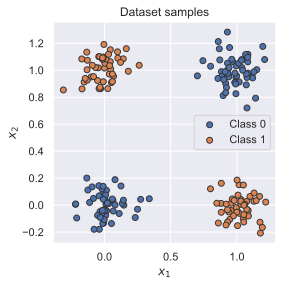

In [43]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### The data loader class

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.
In contrast to the dataset class, we usually don't have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

Let's create a simple data loader below:

In [44]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.0365,  1.0789],
        [-0.1534,  0.9126],
        [ 0.0645,  0.0353],
        [-0.2095, -0.0954],
        [ 1.1956,  1.1768],
        [ 1.1498,  1.0044],
        [ 1.1919, -0.1651],
        [-0.0516, -0.0753]])
Data labels torch.Size([8]) 
 tensor([0, 1, 0, 0, 0, 0, 1, 0])


### Optimization

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

#### Loss modules

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. However, PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). For instance, for BCE, PyTorch has two modules: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. While `nn.BCELoss` expects the inputs $x$ to be in the range $[0,1]$, i.e. the output of a sigmoid, `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class. This version is numerically more stable than using a plain Sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is adviced to use loss functions applied on "logits" where possible (remember to not apply a sigmoid on the output of the model in this case!). For our model defined above, we therefore use the module `nn.BCEWithLogitsLoss`. 

In [45]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1. 

In [46]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`. The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training

Finally, we are ready to train our model. As a first step, we create a slightly larger dataset and specify a data loader with a larger batch size. 

In [47]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Now, we can write a small training function. Remember our five steps: load a batch, obtain the predictions, calculate the loss, backpropagate, and update. Additionally, we have to push all data and model parameters to the device of our choice (GPU if available). For the tiny neural network we have, communicating the data to the GPU actually takes much more time than we could save from running the operation on GPU. For large networks, the communication time is significantly smaller than the actual runtime making a GPU crucial in these cases. 

Here we introduce how to detect and set your device. 

In [48]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Push model to device. Has to be only done once
model.to(device)

Is the GPU available? False
Device cpu


SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In addition, we set our model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using `model.train()` and `model.eval()`.

In [49]:
## Progress bar
from tqdm.notebook import tqdm

def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

In [50]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [51]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.2075, -0.4527],
        [ 2.9394, -2.8646],
        [ 0.1873, -0.2180],
        [-3.1686,  3.3013]])), ('linear1.bias', tensor([-1.0736,  1.4272, -0.8316,  1.5918])), ('linear2.weight', tensor([[-1.6621, -4.5029, -0.9341, -4.5958]])), ('linear2.bias', tensor([2.0791]))])


To save the state dictionary, we can use `torch.save`:


In [52]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [53]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-0.2075, -0.4527],
        [ 2.9394, -2.8646],
        [ 0.1873, -0.2180],
        [-3.1686,  3.3013]])), ('linear1.bias', tensor([-1.0736,  1.4272, -0.8316,  1.5918])), ('linear2.weight', tensor([[-1.6621, -4.5029, -0.9341, -4.5958]])), ('linear2.bias', tensor([2.0791]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-0.2075, -0.4527],
        [ 2.9394, -2.8646],
        [ 0.1873, -0.2180],
        [-3.1686,  3.3013]])), ('linear1.bias', tensor([-1.0736,  1.4272, -0.8316,  1.5918])), ('linear2.weight', tensor([[-1.6621, -4.5029, -0.9341, -4.5958]])), ('linear2.bias', tensor([2.0791]))])


A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [54]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can deactivate the computation graph using `with torch.no_grad(): ...`. Remember to additionally set the model to eval mode.

In [55]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [56]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


If we trained our model correctly, we should see a score close to 100% accuracy. However, this is only possible because of our simple task, and unfortunately, we usually don't get such high scores on test sets of more complex tasks.

## Additional features we didn't get to discuss yet

Finally, you are all set to start with your own PyTorch project! In summary, we have looked at how we can build neural networks in PyTorch, and train and test them on data. However, there is still much more to PyTorch we haven't discussed yet. In the coming series of Jupyter notebooks, we will discover more and more functionalities of PyTorch, so that you also get familiar to PyTorch concepts beyond the basics. If you are already interested in learning more of PyTorch, we recommend the official [tutorial website](https://pytorch.org/tutorials/) that contains many tutorials on various topics. Especially logging with Tensorboard ([official tutorial here](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)) is a good practice.